# Edited Nearest Neighbours
Machine Learning with Imbalanced Data - Course

The algorithms works as follows:

1. Train a KNN algorithm on the data (user defines number of neighbours, typically 3)

2. Find the 3 nearest neighbour to each observation (or the number defined by the user in 1)

3. Find the label of each of the neighbours (we know it, is the target in the dataset)

Two undersampling strategies:

4. mode: if the majority of the neighbours show the same label as the observation, then we keep the observation

5. all: if all the neighbours show the same label as the observation, then we keep the observation

6. Alternatively, we remove the observation of the dataset - undersample

7. The undersampled dataset, is the one left after removing observations

===

The algorithm removes observations which class are different from that of their neighbours. These are generally the observations difficult to classify and / or that introduce noise.

**In practice, samples of the majority class that are too similar to an observation of the minority class will be removed.**

So this is, in essence, the opposite of Condensed NN.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import EditedNearestNeighbours

## Create data
We will create data where the classes have different degrees of separateness

In [2]:
def make_data(sep):
    # return arrays
    X, y = make_classification(n_samples=1000,
                               n_features=2,
                               n_redundant=0,
                               n_clusters_per_class=1,
                               weights=[0.99],
                               class_sep=sep,   # how separate the classes are
                               random_state=1,)
    
    # transform arrays into pandas df and series
    X = pd.DataFrame(X, columns=['varA', 'varB'])
    y = pd.Series(y)

    return X, y

0    983
1     17
Name: count, dtype: int64


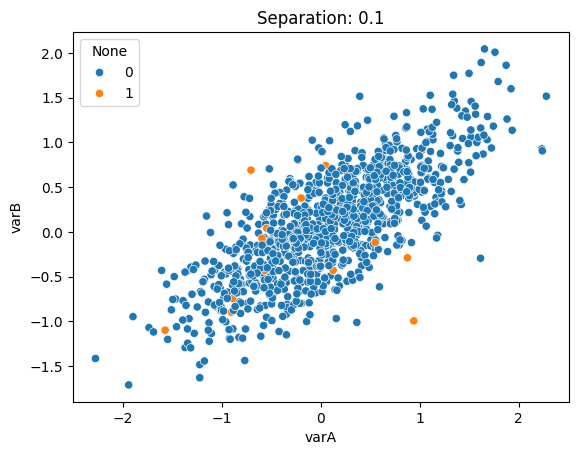

0    983
1     17
Name: count, dtype: int64


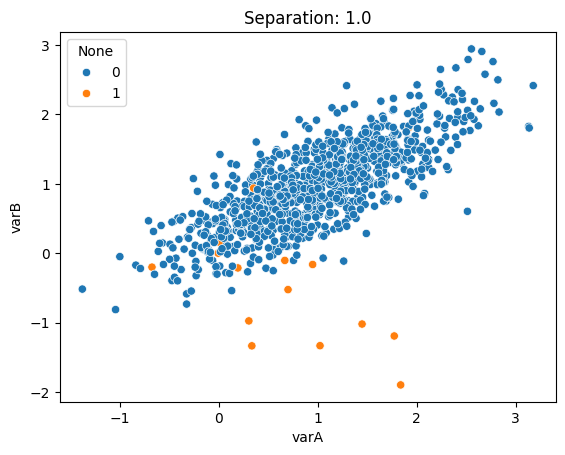

0    983
1     17
Name: count, dtype: int64


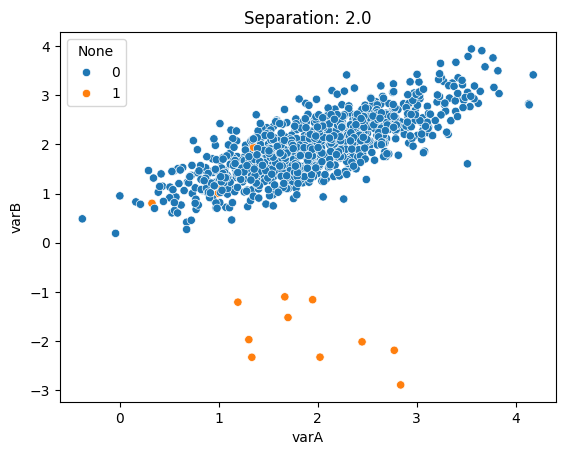

In [3]:
# make datasets with different class separateness
# and plot
for sep in [0.1, 1., 2.]:
    X, y = make_data(sep)
    print(y.value_counts())

    sns.scatterplot(data=X, x='varA', y='varB', hue=y)
    plt.title('Separation: {}'.format(sep))
    plt.show()

As we increase the parameter `sep`, the minority and majority class show less degree of overlap.

## Undersample with Edited Nearest Neighbours

### Well separated classes

In [4]:
# create data
X, y = make_data(sep=2)

# set up edited nearest neighbour
enn = EditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3,  # the number of neighbours to examine
    kind_sel='all',     # all neighbours need to have the same label as the observation examined
    n_jobs=-1
)

X_resampled, y_resampled = enn.fit_resample(X, y)

In [5]:
# size of original data
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# size of undersampled data
X_resampled.shape, y_resampled.shape

((978, 2), (978,))

The procedure removed a few observations closer to the minority class.

In [7]:
# number of minority class observations
y.value_counts()

0    983
1     17
Name: count, dtype: int64

In [8]:
# number of majority class observations after undersampling
y_resampled.value_counts()

0    961
1     17
Name: count, dtype: int64

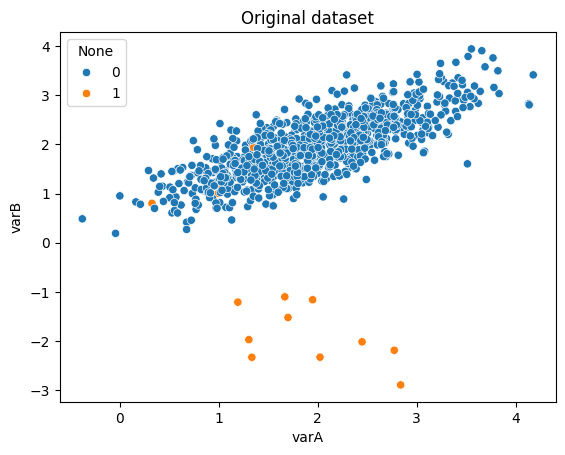

In [9]:
sns.scatterplot(data=X, x='varA', y='varB', hue=y)

plt.title('Original dataset')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

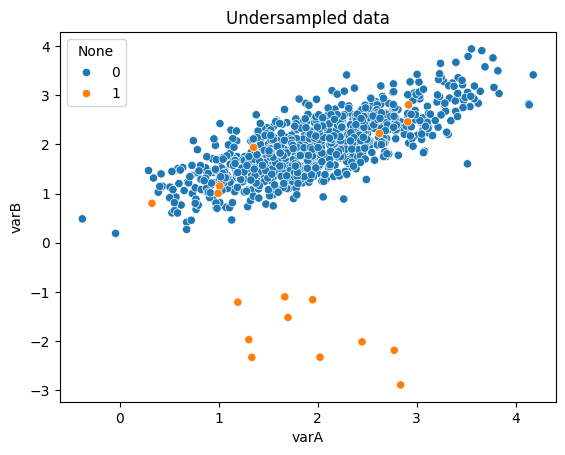

In [10]:
# plot undersampled data
sns.scatterplot(X_resampled, x='varA', y='varB', hue=y_resampled)

plt.title('Undersampled data')
plt.show

Note how some yellow dots can now be seen clearer, as their neighbouring observations from the majority class were removed from the dataset.

Edited Nearest Neighbours removes observations from the majority class that are too similar to some of those in the minority class.

### Partially separated classes

In [11]:
# create data
X, y = make_data(sep=0.5)

# set up edited nearest neighbour
enn = EditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3,  # the number of neighbours to examine
    kind_sel='all',     # all neighbours need to have the same label as the observation examined
    n_jobs=-1
)

X_resampled, y_resampled = enn.fit_resample(X, y)

In [12]:
# size of original data
X.shape, y.shape

((1000, 2), (1000,))

In [13]:
# size of undersampled data
X_resampled.shape, y_resampled.shape

((961, 2), (961,))

As the classes are not so clearly distinguished, more samples were removed from the dataset.

In [14]:
# number of minority class observations
y.value_counts()

0    983
1     17
Name: count, dtype: int64

In [15]:
# number of majority class observations after undersampling
y_resampled.value_counts()

0    944
1     17
Name: count, dtype: int64

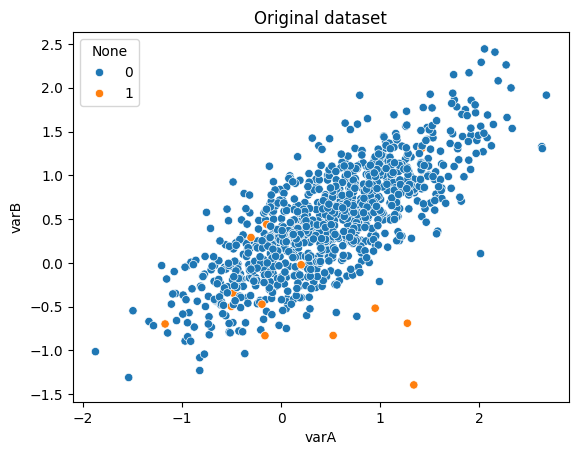

In [16]:
sns.scatterplot(data=X, x='varA', y='varB', hue=y)

plt.title('Original dataset')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

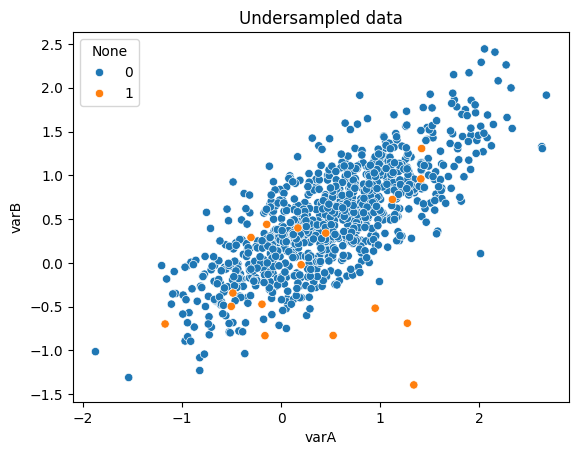

In [17]:
# plot undersampled data
sns.scatterplot(X_resampled, x='varA', y='varB', hue=y_resampled)

plt.title('Undersampled data')
plt.show

Notice again, that observations have been cleared from the surroundings of those of the minority class.

Note that if we pass an integer to the argument n_neighbors=3, 3 is the number of neighbours to examine, we will look at the 3 closest neighbours to determine if a sample is kept or removed.

If instead of an integer, you want to pass a KNN class from Scikit-learn, like the KNeighborsClassifier, remember that to examine 3 neighbours, you need to train a 4 KNN as the observation will be 1 of the neighbours itself.

## Edited Nearest Neighbours
### Real data - Performance comparison
Does it work well with real datasets?

In [18]:
# Load data
data = pd.read_csv('../datasets/kdd2004.csv')

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [19]:
# imbalanced target
data['target'].value_counts(normalize=True)

target
-1    0.991108
 1    0.008892
Name: proportion, dtype: float64

In [20]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [21]:
# edited nearest neighbours
enn = EditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3,
    kind_sel='all',
    n_jobs=-1
)

X_enn, y_enn = enn.fit_resample(X_train, y_train)

In [22]:
# compare shapes
X_train.shape, X_enn.shape

((102025, 74), (101230, 74))

## Plot data

Text(0.5, 1.0, 'Original data')

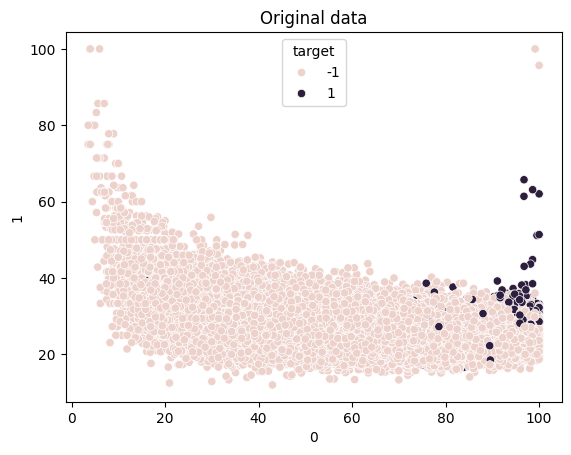

In [23]:
# original data

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

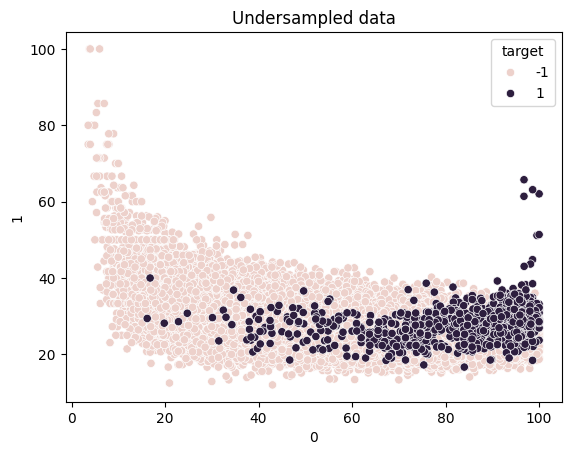

In [24]:
# undersampled data

sns.scatterplot(data=X_enn,
                x="0",
                y="1",
                hue=y_enn)

plt.title('Undersampled data')

Text(0.5, 1.0, 'Original data')

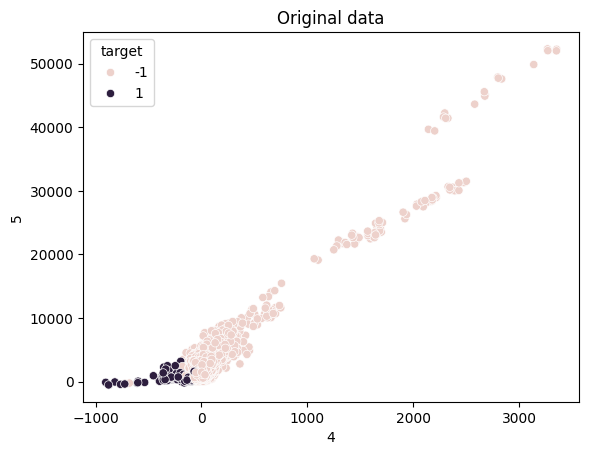

In [25]:
# original data - other set of variables

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

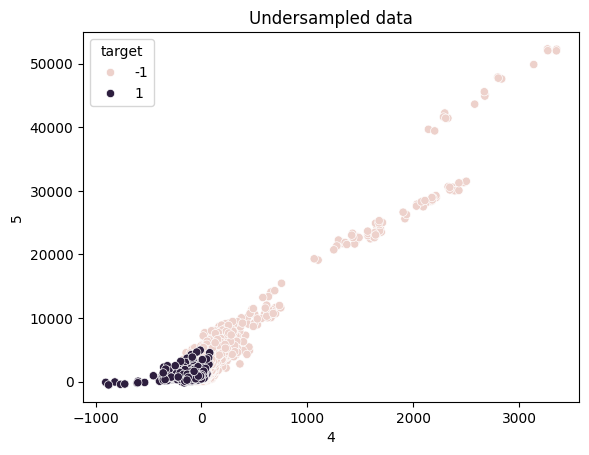

In [26]:
# undersampled data

sns.scatterplot(data=X_enn,
                x="4",
                y="5",
                hue=y_enn)

plt.title('Undersampled data')

## Machine learning performance comparison

In [27]:
# function to train random forests and evaluate the performance
def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [28]:
# evaluate performance of algorithm built
# using imbalanced dataset
run_randomForests(X_train, X_test, y_train, y_test)

Train set
Random Forests roc-auc: 0.9736769545142595
Test set
Random Forests roc-auc: 0.9724711107235364


In [30]:
# evaluate performance of algorithm built
# using undersampled dataset
run_randomForests(X_enn, X_test, y_enn, y_test)

Train set
Random Forests roc-auc: 0.9739347640678795
Test set
Random Forests roc-auc: 0.9722237753708248


Performance did not increase with this method